In [1]:
import pandas as pd
import numpy as np
from scipy import stats
from scipy.stats import kurtosis, skew
import matplotlib.pyplot as plt
import itertools
import seaborn as sns

In [2]:
df = pd.read_csv(r'D:\Self\USD\Probability and Stats\Team Project\train.csv')
df.pop('id')
df.head()

Sex  Age  Height  Weight  Duration  Heart_Rate  Body_Temp  Calories
0    male   36   189.0    82.0      26.0       101.0       41.0     150.0
1  female   64   163.0    60.0       8.0        85.0       39.7      34.0
2  female   51   161.0    64.0       7.0        84.0       39.8      29.0
3    male   20   192.0    90.0      25.0       105.0       40.7     140.0
4  female   38   166.0    61.0      25.0       102.0       40.6     146.0

In [10]:
df.describe()

Age         Height         Weight       Duration  \
count  750000.000000  750000.000000  750000.000000  750000.000000   
mean       41.420404     174.697685      75.145668      15.421015   
std        15.175049      12.824496      13.982704       8.354095   
min        20.000000     126.000000      36.000000       1.000000   
25%        28.000000     164.000000      63.000000       8.000000   
50%        40.000000     174.000000      74.000000      15.000000   
75%        52.000000     185.000000      87.000000      23.000000   
max        79.000000     222.000000     132.000000      30.000000   

          Heart_Rate      Body_Temp       Calories  
count  750000.000000  750000.000000  750000.000000  
mean       95.483995      40.036253      88.282781  
std         9.449845       0.779875      62.395349  
min        67.000000      37.100000       1.000000  
25%        88.000000      39.600000      34.000000  
50%        95.000000      40.300000      77.000000  
75%       103.000000      40.700000     136.000000  
max       128.000000      41.500000     314.000000

In [11]:
df.isnull().sum()

Sex           0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

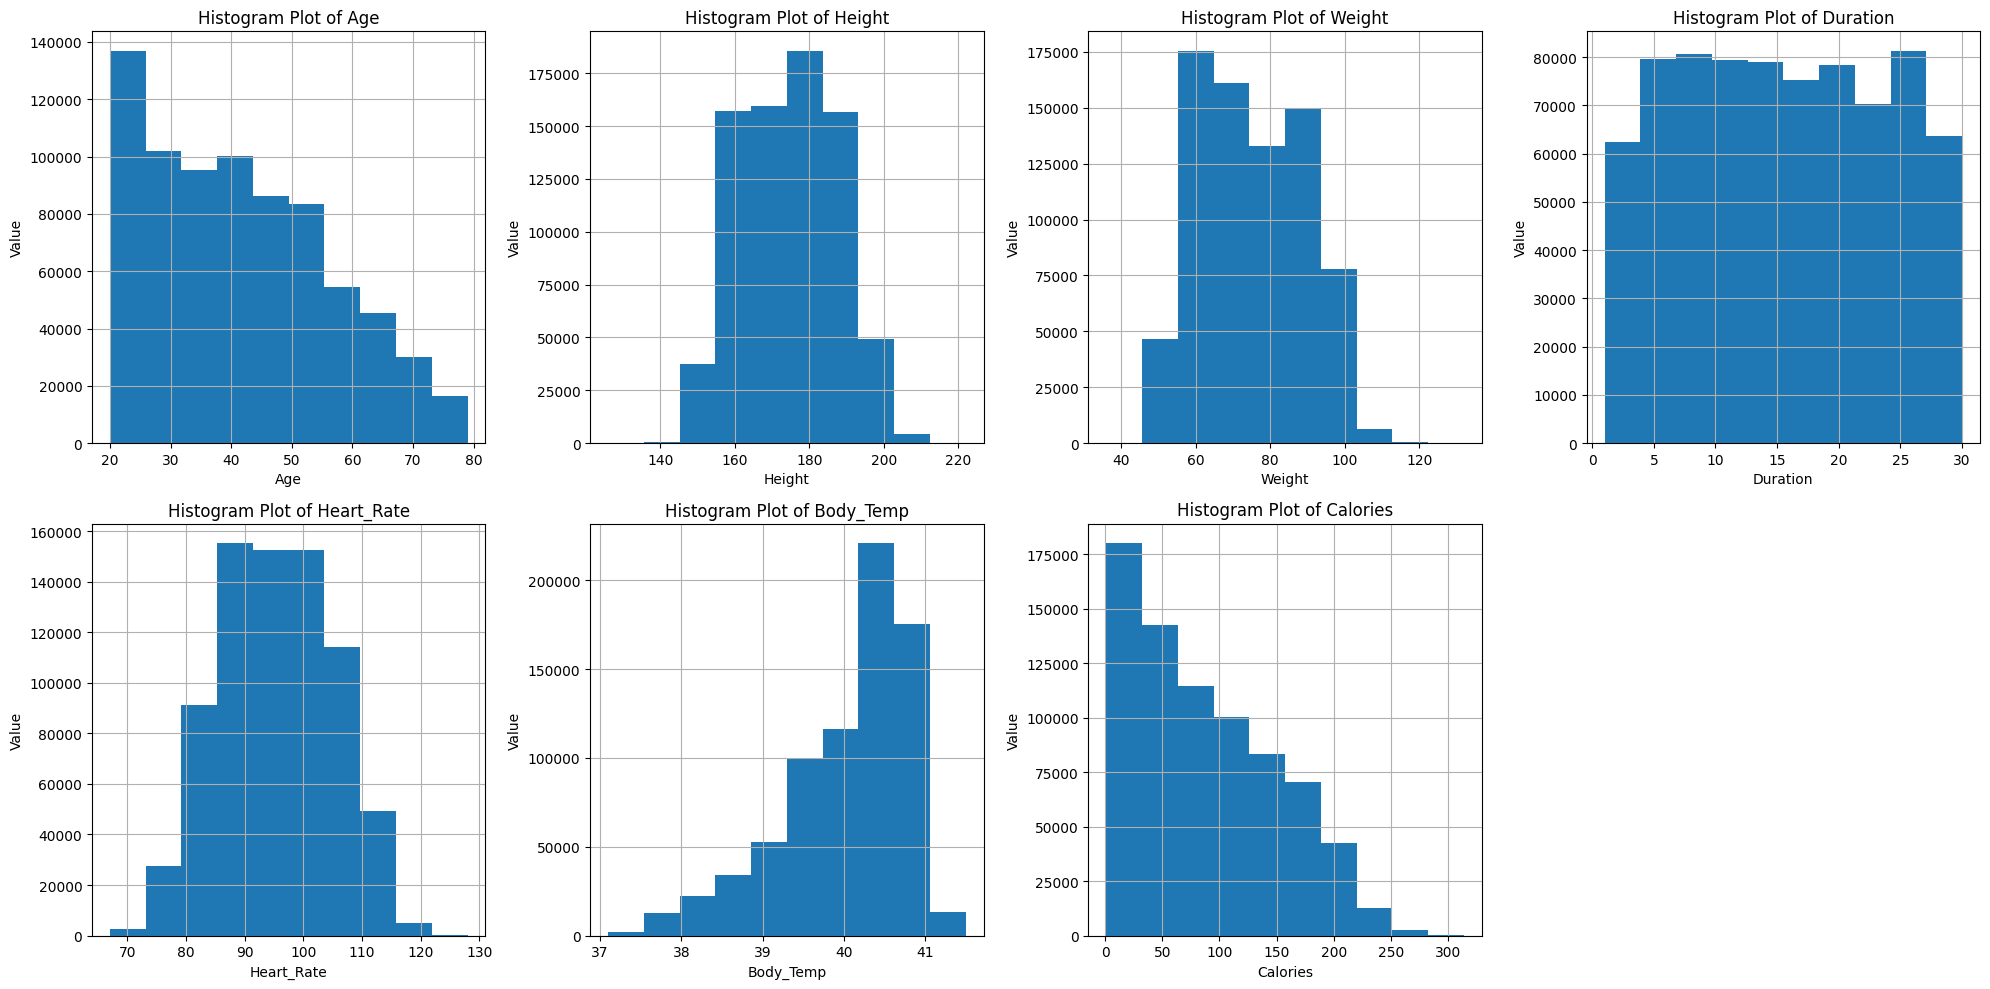


 Skewnness:
Age 0.4363966028658865
Height 0.05177702018637902
Weight 0.2111934417349851
Duration 0.026258898064265637
Heart_Rate -0.0056681469643112955
Body_Temp -1.022359270949892
Calories 0.5391951861298309


In [3]:
features = ['Age','Height','Weight','Duration','Heart_Rate','Body_Temp','Calories']
fig,axes = plt.subplots(nrows=2, ncols = 4,figsize = (20,10))
axes = axes.flatten()

for i,feature in enumerate(features):
    axes[i].hist(df[feature])
    axes[i].set_title(f'Histogram Plot of {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Value')
    axes[i].grid(True)

for j in range(len(features), len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

print('\n Skewnness:')

for x in features:
    print(x, skew(df[x]))

**Observation:**
1. Age and Calories - Right skewed data
2. Height, Weight and Heart Rate - Normal Data
3. Body_Temp - Left Skewed Data
4. Duration - Uniform Data

In [4]:
print('Kurtosis:')
for x in features:
    print(x, kurtosis(df[x],fisher=True))


Kurtosis:
Age -0.746341190057942
Height -0.8398025617845954
Weight -0.9960788523395663
Duration -1.1953904529734882
Heart_Rate -0.6765664499730066
Body_Temp 0.5196126941988477
Calories -0.6895165435601176


**Observation:**
Type	Kurtosis Value (excess kurtosis)	Description
Mesokurtic	≈ 0	Normal distribution shape
Leptokurtic	> 0	Heavy tails and sharp peak (more outliers)
Platykurtic	< 0	Light tails and flat peak (fewer outliers)

So, in our data **Body Temperature** has kurtossi greater than 0, indicating high outliers.

Let's visualize the outliers through box plots.

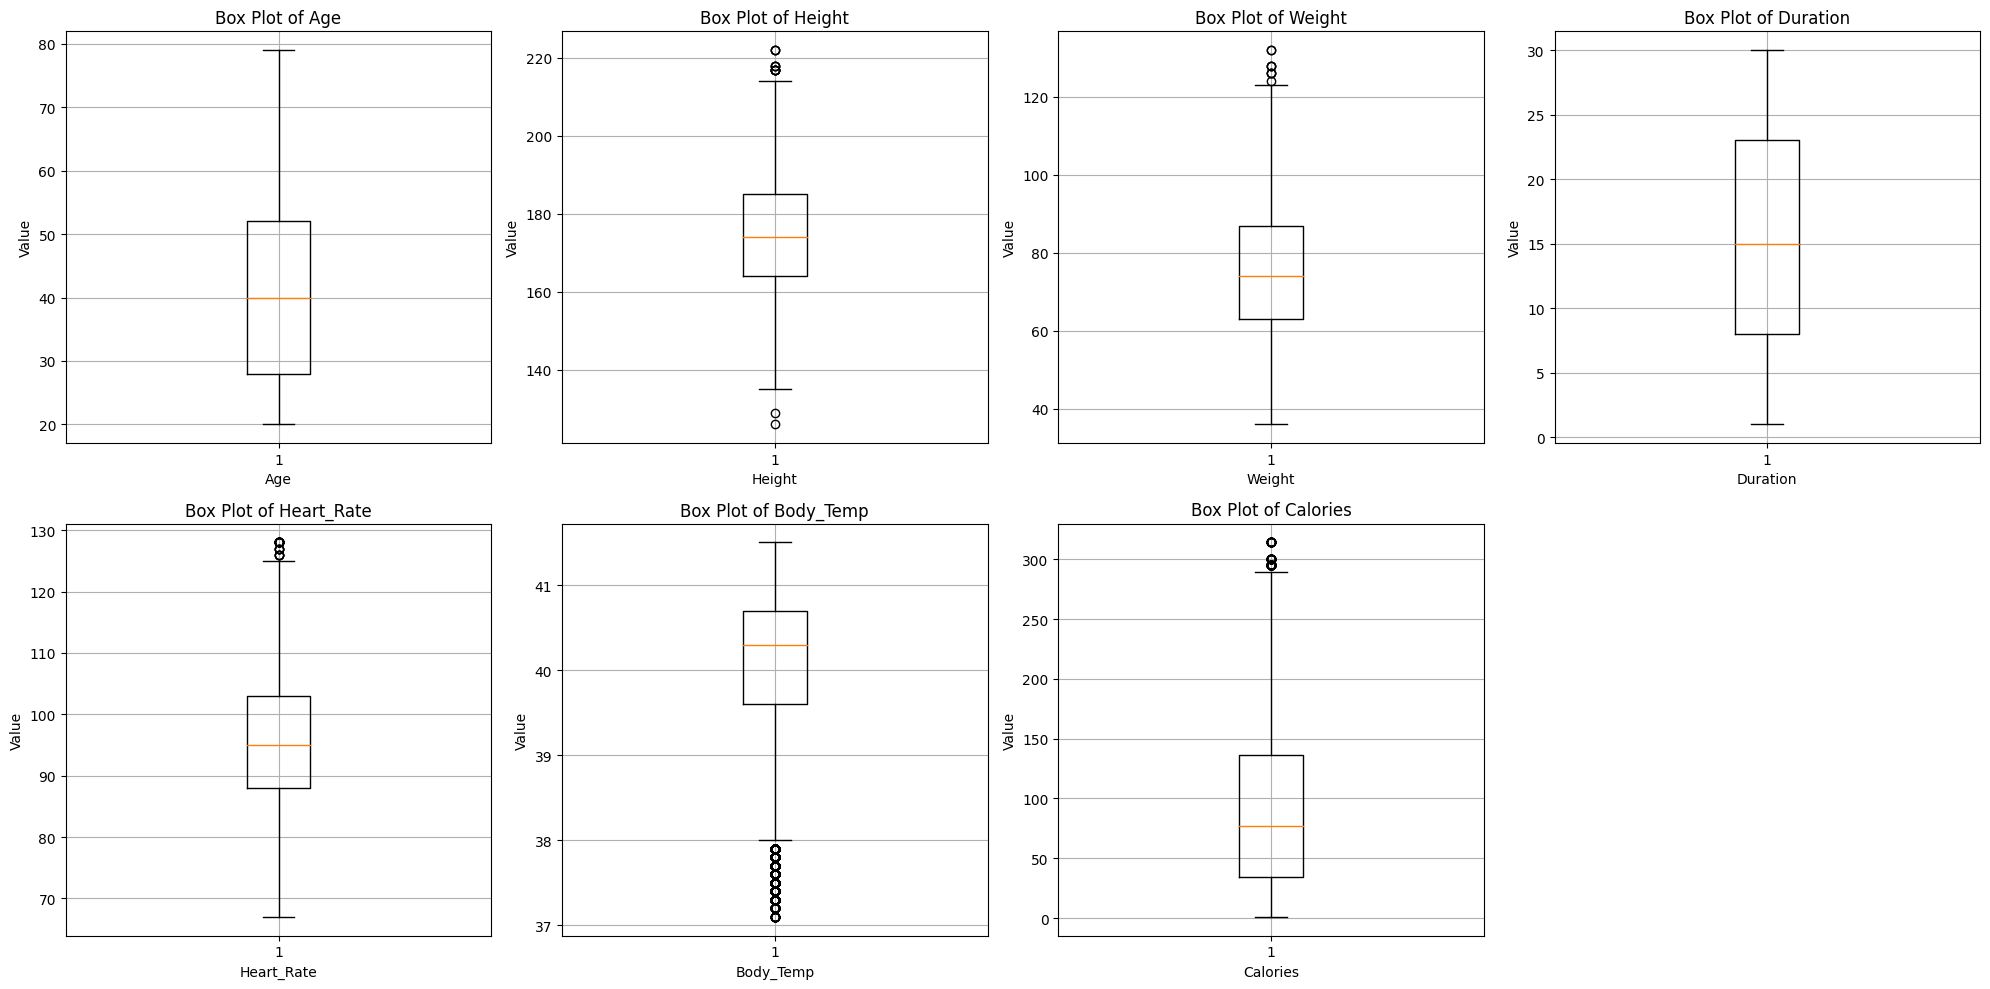

In [8]:
features = ['Age','Height','Weight','Duration','Heart_Rate','Body_Temp','Calories']
fig,axes = plt.subplots(nrows=2, ncols = 4,figsize = (20,10))
axes = axes.flatten()

for i,feature in enumerate(features):
    axes[i].boxplot(df[feature])
    axes[i].set_title(f'Box Plot of {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Value')
    axes[i].grid(True)

for j in range(len(features), len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

Observations:
- Body temperature has a lot of outliers are the left tail
- The spread of Duration variable is the highest amongst other, and we already know it has uniform distribution. Thus, the dataset has a high range of duration values wih uniform distribution

**Investigating IQR for all data and seeing how many observations are outside the range**

In [21]:
def fn_calcIQR_Outlier_Count(df):
    results=[]

    for column in df.columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        z_scores_values = np.round(np.abs(stats.zscore(df[column])),2)
        Z_scores_outliers_count = sum([1 for z in z_scores_values if z > 3])
        lower_bound = np.round(Q1 - 1.5 * IQR,2)
        upper_bound = np.round(Q3 + 1.5 * IQR,2)
        below_lower = df[df[column] < lower_bound].shape[0]
        above_upper = df[df[column] > upper_bound].shape[0]
        
        results.append({
            'Column': column,
            'IQR': IQR,
            
            'Lower Bound': lower_bound,
            'Upper Bound': upper_bound,
            'Below Lower Bound': below_lower,
            'Above Upper Bound': above_upper,
            'z_scores': Z_scores_outliers_count,
                })
    
    return pd.DataFrame(results)

# Calculate IQR, bounds, and outlier counts
outlier_info = fn_calcIQR_Outlier_Count(df[features])
outlier_info

Column    IQR  Lower Bound  Upper Bound  Below Lower Bound  \
0         Age   24.0        -8.00        88.00                  0   
1      Height   21.0       132.50       216.50                  2   
2      Weight   24.0        27.00       123.00                  0   
3    Duration   15.0       -14.50        45.50                  0   
4  Heart_Rate   15.0        65.50       125.50                  0   
5   Body_Temp    1.1        37.95        42.35              14919   
6    Calories  102.0      -119.00       289.00                  0   

   Above Upper Bound  z_scores  
0                  0         0  
1                 12        38  
2                  9       104  
3                  0         0  
4                 36       175  
5                  0      3368  
6                139       312

In [24]:
from scipy.stats import median_abs_deviation

# Calculate Median and MAD (Median Absolute Deviation)
median_value = np.median(df['Body_Temp'])
mad = median_abs_deviation(df['Body_Temp'])

# Calculate the modified Z-scores
modified_z_scores = 0.6745 * (df['Body_Temp'] - median_value) / mad

# Count the observations with modified Z-score greater than a threshold (e.g., 3.5)
outliers = (np.abs(modified_z_scores) > 3.5).sum()

print(f"Count of outliers based on Modified Z-Score: {outliers}")

Count of outliers based on Modified Z-Score: 27299


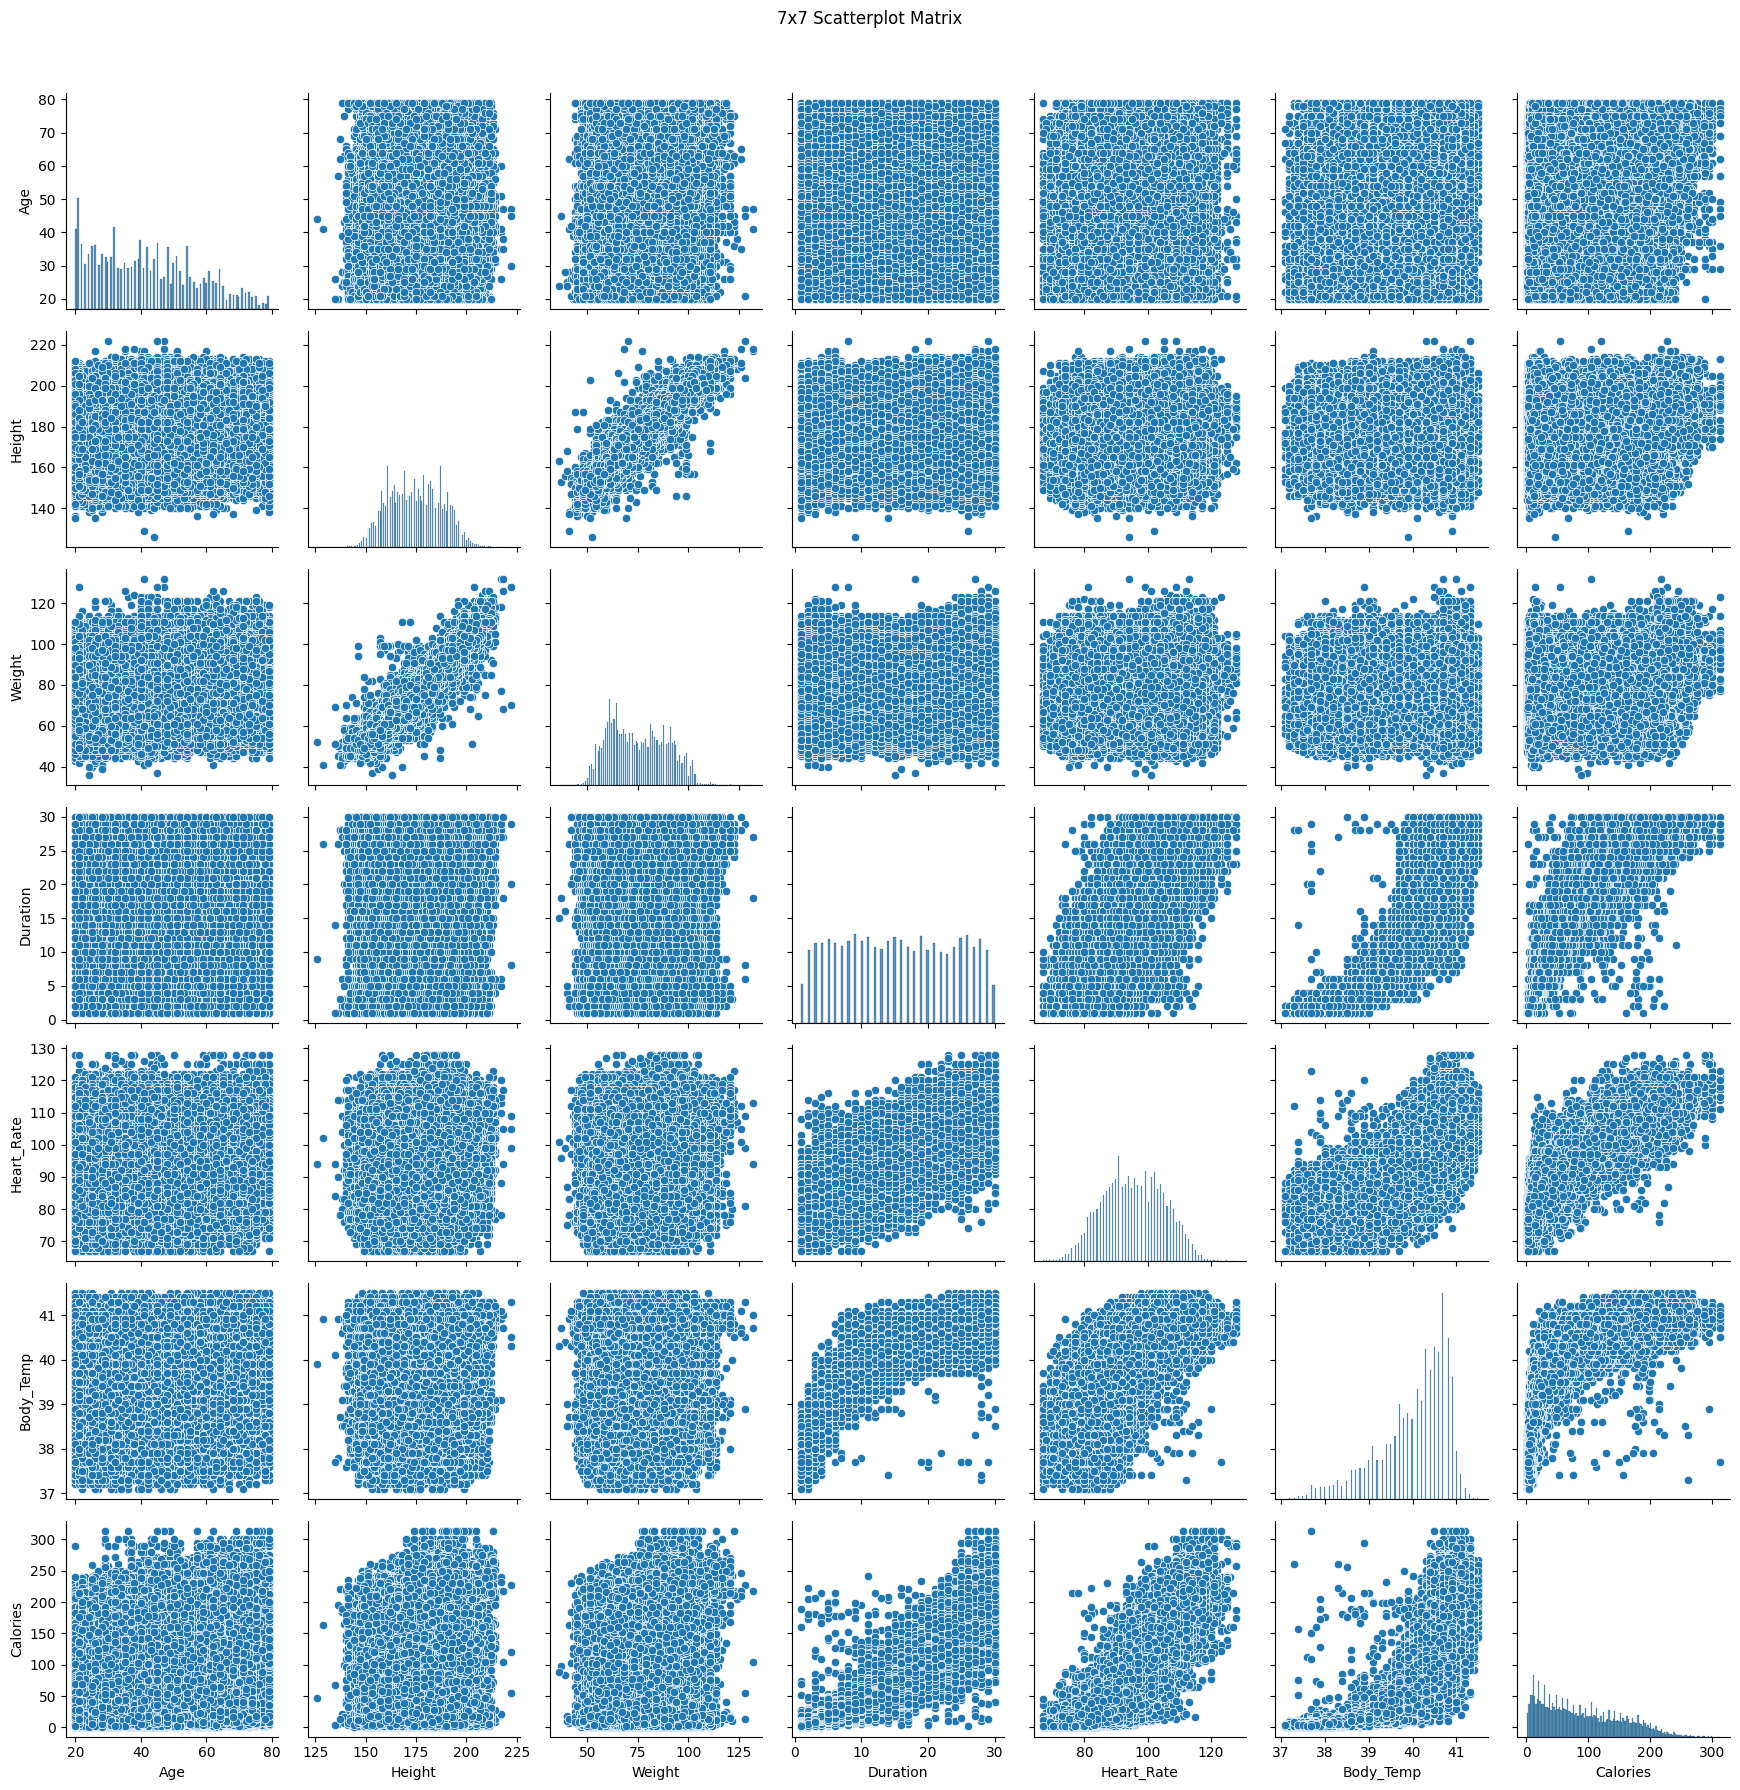

In [12]:
sns.pairplot(df)
plt.suptitle("7x7 Scatterplot Matrix", y=1.02)
plt.tight_layout()
plt.show()

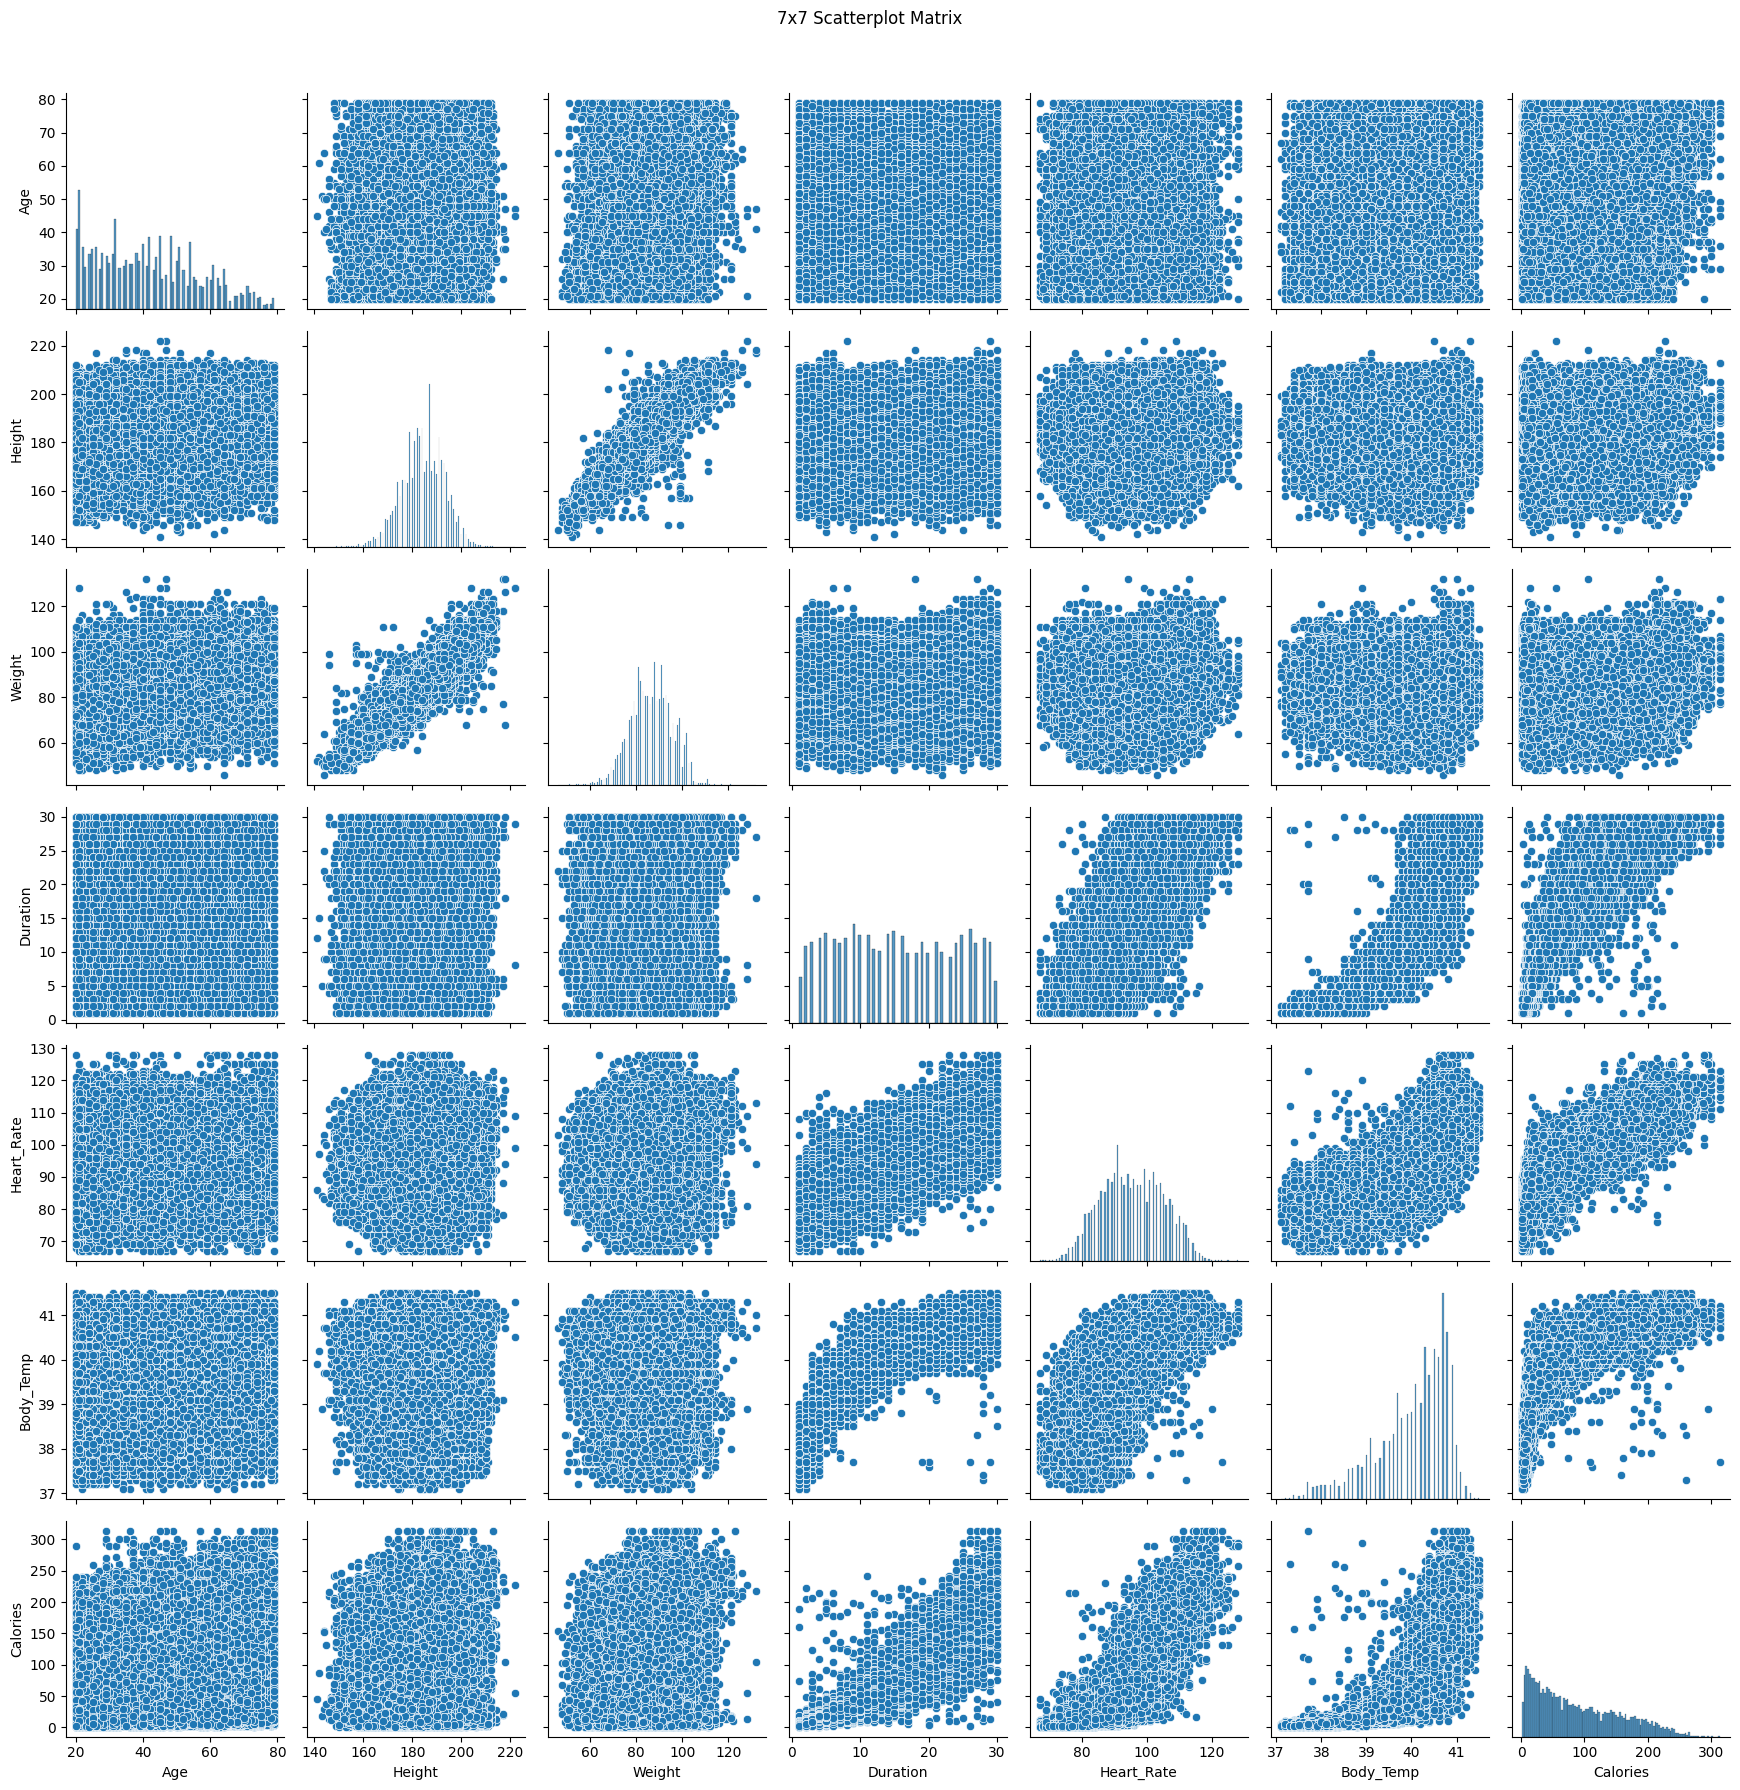

In [15]:
df_male = df[df['Sex']=='male']
sns.pairplot(df_male)
plt.suptitle("7x7 Scatterplot Matrix", y=1.02)
plt.tight_layout()
plt.show()

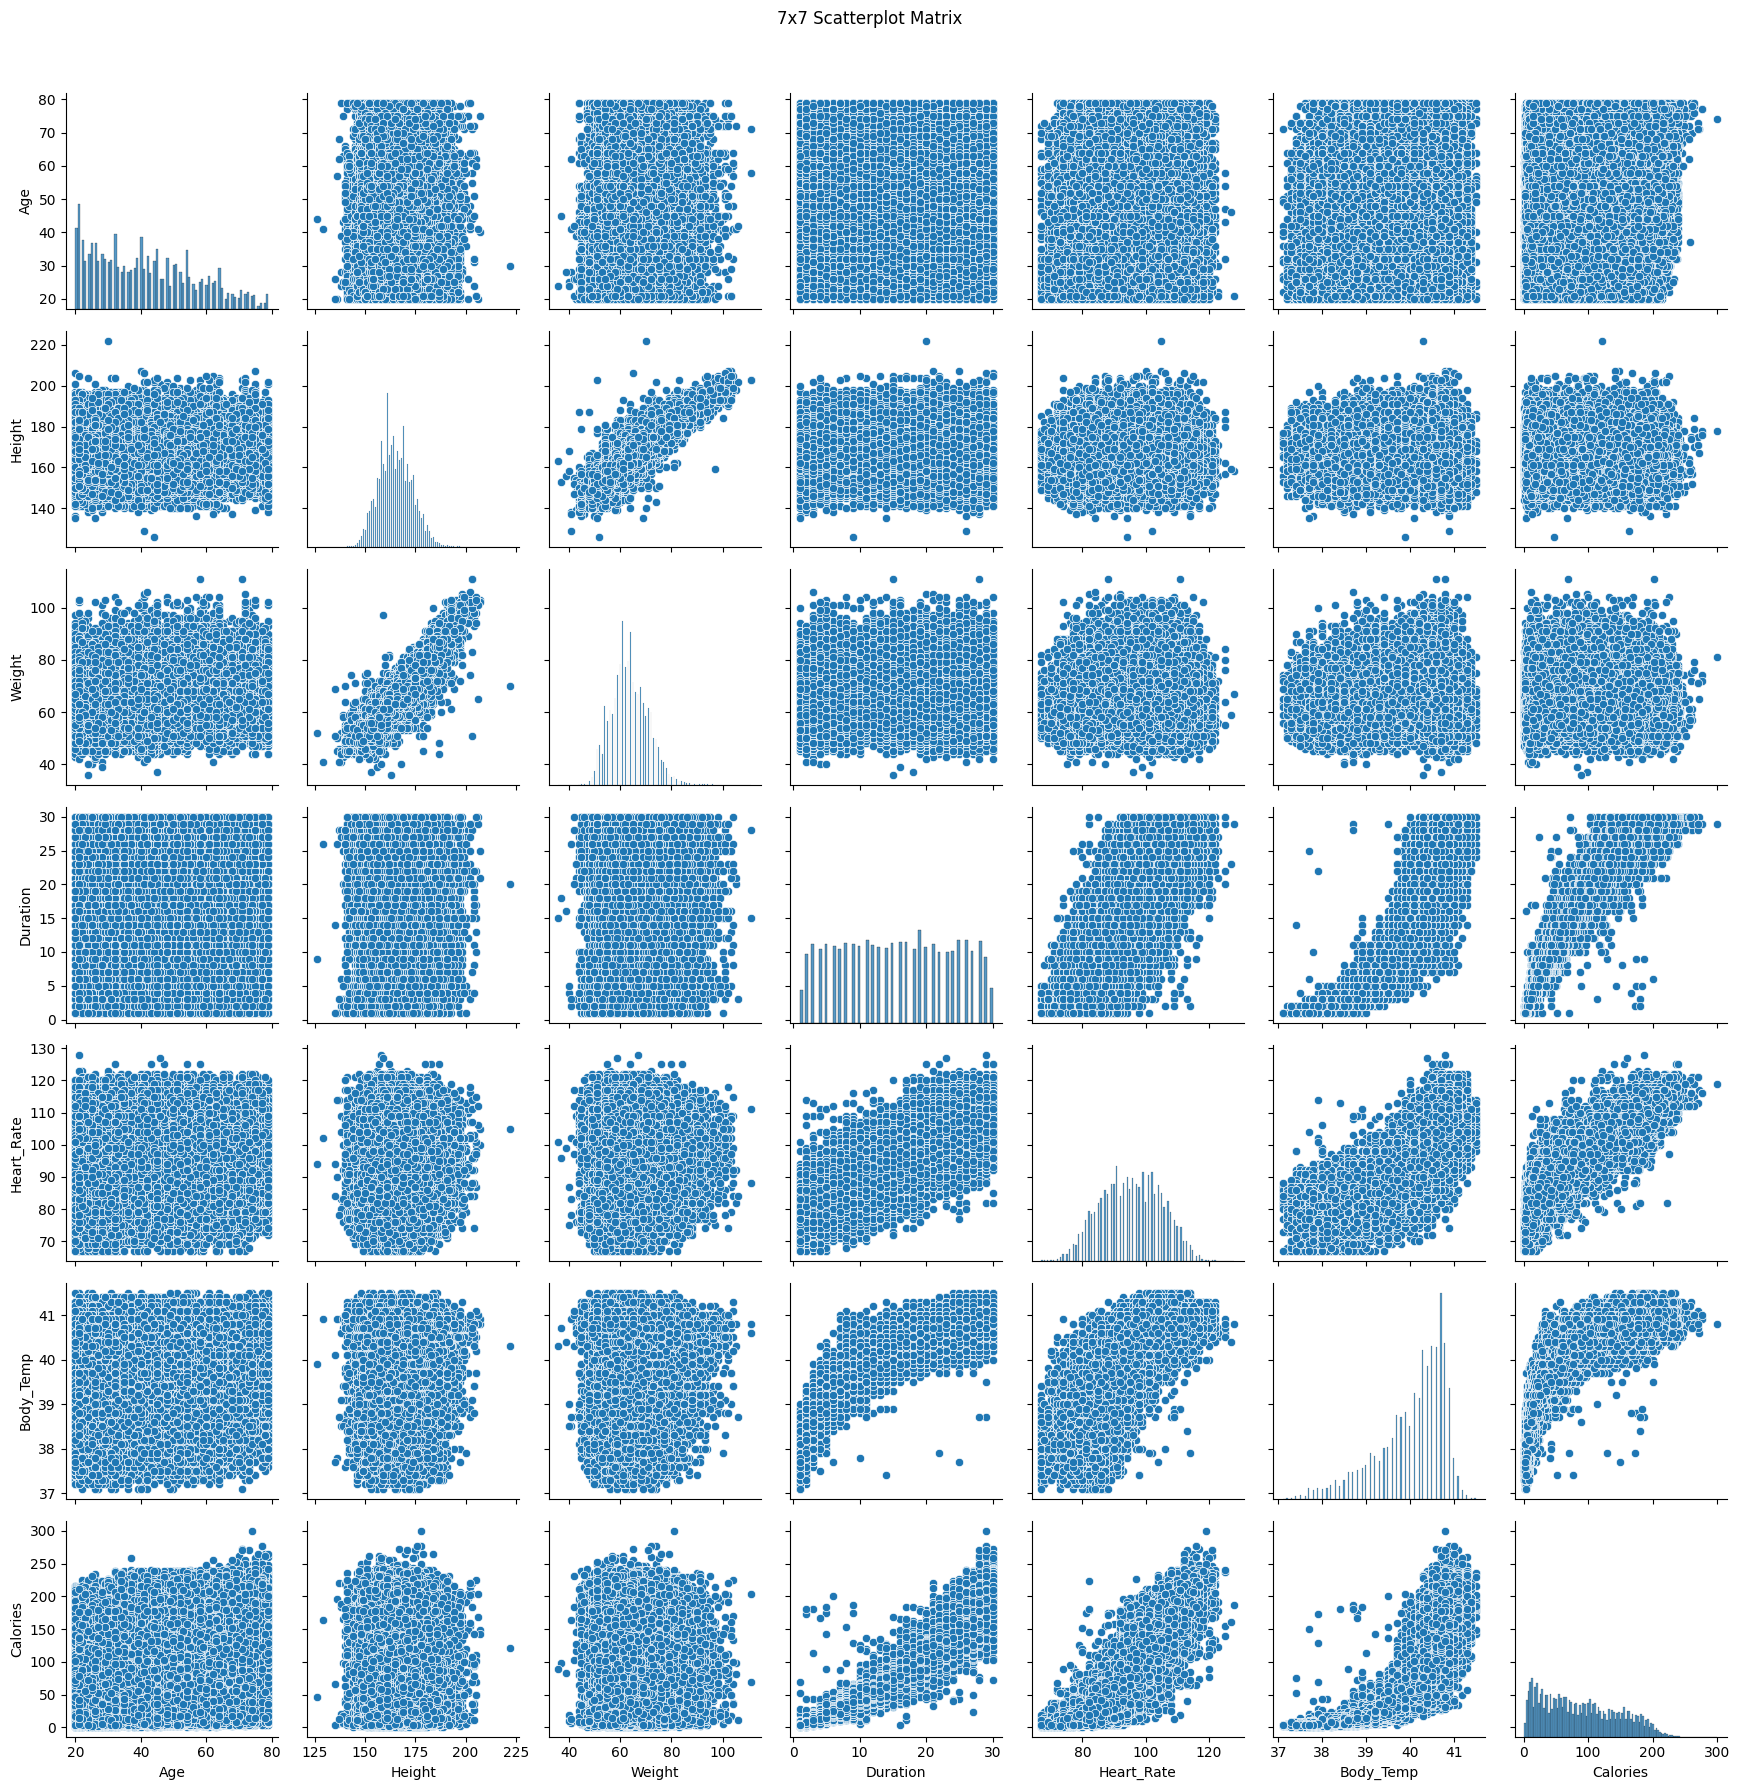

In [16]:
df_female = df[df['Sex']=='female']
sns.pairplot(df_female)
plt.suptitle("7x7 Scatterplot Matrix", y=1.02)
plt.tight_layout()
plt.show()

In [ ]:
sns.pairplot(df, hue = 'Sex')
plt.suptitle("7x7 Scatterplot Matrix", y=1.02)
plt.tight_layout()
plt.show()